In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
import random 

### Memmap data

In [2]:
arr = np.memmap('image_data.npy', dtype=np.int8, mode='r', shape = (100000,275*210))
arr.shape

(100000, 57750)

### Create Base PCA Models on Subset of Data to find optimum n_components

In [12]:
n = arr.shape[0] # how many rows we have in the dataset
fold_size = 2000 # how many rows we feed to IPCA at a time, the divisor of n

performance = {}

for i in range(1, 20):
    idx = np.random.randint(n, size=fold_size)
    pca = PCA(n_components=1000//i)
    pca.fit(arr[idx])
    print(f'{i}\t/\t {n//fold_size}',end='\r',flush=True)
    performance[f'{1000//i}'] = np.cumsum(pca.explained_variance_ratio_)

#### Looking at performance it seems like between 200 and 400 components will be ideal

In [25]:
for key in performance.keys():
    print(f'{key}:\t{np.argmax(performance[key] >= 0.6) + 1}\t{np.argmax(performance[key] >= 0.7) + 1}\t{np.argmax(performance[key] >= 0.8) + 1}')

1000:	219	424	718
500:	205	415	1
333:	226	1	1
250:	233	1	1
200:	1	1	1
166:	1	1	1
142:	1	1	1
125:	1	1	1
111:	1	1	1
100:	1	1	1
90:	1	1	1
83:	1	1	1
76:	1	1	1
71:	1	1	1
66:	1	1	1
62:	1	1	1
58:	1	1	1
55:	1	1	1
52:	1	1	1


#### Let's verify this by training a new sample of models within our range with larger training data

In [26]:
n = arr.shape[0] # how many rows we have in the dataset
fold_size = 4000 # how many rows we feed to IPCA at a time, the divisor of n

performance_test = {}

for i in range(200, 500, 20):
    idx = np.random.randint(n, size=fold_size)
    pca = PCA(n_components=i)
    pca.fit(arr[idx])
    print(f'{i}',end='\r',flush=True)
    performance_test[f'{i}'] = np.cumsum(pca.explained_variance_ratio_)

#### It seems around 320 components gives us consistent results

In [28]:
for key in performance_test.keys():
    print(f'{key}:\t{np.argmax(performance_test[key] >= 0.6) + 1}\t{np.argmax(performance_test[key] >= 0.7) + 1}\t{np.argmax(performance_test[key] >= 0.8) + 1}')

200:	1	1	1
220:	1	1	1
240:	1	1	1
260:	1	1	1
280:	1	1	1
300:	1	1	1
320:	1	1	1
340:	319	1	1
360:	310	1	1
380:	322	1	1
400:	319	1	1
420:	313	1	1
440:	337	1	1
460:	336	1	1
480:	305	1	1


#### Time to fit a model on the whole Data set

In [3]:
n = arr.shape[0] # how many rows we have in the dataset
chunk_size = 2000 # how many rows we feed to IPCA at a time, the divisor of n

performance_test = {}

for i in range(0, n//chunk_size):
    pca = IncrementalPCA(n_components=320)
    pca.partial_fit(arr[i*chunk_size : (i+1)*chunk_size])
    print(f'{i}\t/\t {n//chunk_size}',end='\r',flush=True)



(4, 57750)

0.7145368390405614
reduced shape: (5, 320)
recovered shape: (5, 57750)


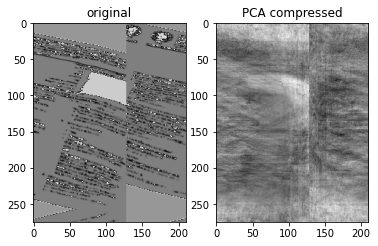

In [35]:
print(np.cumsum(pca.explained_variance_ratio_).max())
idx = random.randint(0, arr.shape[0])
x = arr[idx:idx+5]
x1 = pca.transform(x)
x2 = pca.inverse_transform(x1)
print("reduced shape: " + str(x1.shape))
print("recovered shape: " + str(x2.shape))
import matplotlib.pyplot as plt

f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(x[0].reshape((275,210)), cmap='gray')
f.add_subplot(1,2, 2)

plt.title("PCA compressed")
plt.imshow(x2[0].reshape((275,210)), cmap='gray')
plt.show(block=True)

In [12]:
import pickle 

with open('pca_model_320', 'wb') as handle:
    pickle.dump(pca, handle)

In [43]:
out = np.memmap('image_data_320.npy', dtype=np.int8, mode='w+', shape = (100000,320))
out.shape

n = arr.shape[0] # how many rows we have in the dataset
chunk_size = 2000 # how many rows we feed to IPCA at a time, the divisor of n

for i in range(0, n//chunk_size):
    x = pca.transform(arr[i*chunk_size : (i+1)*chunk_size])
    out[i*chunk_size : (i+1)*chunk_size] = x
    print(f'{i}\t/\t {n//chunk_size}',end='\r',flush=True)
out.flush()